### Imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

### Utility Functions

In [2]:
def bgr_to_rgb(image):
    b,g,r = cv2.split(image)
    return cv2.merge([r,g,b])

def compare_images(image1, image2, cmap=None):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))
    f.tight_layout()
    ax1.imshow(image1, cmap=cmap)
    ax1.set_title('Original Image', fontsize=20)
    ax2.imshow(image2, cmap=cmap)
    ax2.set_title('Processed Image', fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

def read_image_files(path):
    images = []
    image_files = glob.glob('./camera_cal/calibration*.jpg')
    #add some error checking
    for image_file in image_files:
        images.append(bgr_to_rgb(cv2.imread(image_file)))
    return images

def trap_area(deminsions):
    bt1 = np.float32(deminsions[0][0])
    bt2 = np.float32(deminsions[3][0])
    bb1 = np.float32(deminsions[1][0])
    bb2 = np.float32(deminsions[2][0])
    h1 = np.float32(deminsions[0][1])
    h2 = np.float32(deminsions[1][1])
    baset = abs(bt1-bt2)
    baseb = abs(bb1-bb2)
    height = abs(h1-h2)
    return ((baset + baseb)/2.0)*height +29

def rec_deminsions(rec_deminsions, trap_area):
    new_demin = np.copy(rec_deminsions)
    new_demin[0][0] = rec_deminsions[1][0]
    new_demin[3][0] = rec_deminsions[2][0]
    sq_width = abs(rec_deminsions[1][0] - rec_deminsions[2][0])
    sq_height = trap_area/sq_width
    new_demin[0][1] = int(new_demin[0][1] - sq_height)
    new_demin[3][1] = int(new_demin[3][1] - sq_height)
    return new_demin

In [10]:
cal_images = read_image_files('./camera_cal/calibration*.jpg')
test_images = read_image_files('./test_images/*.jpg')


### Camer Calibration

In [4]:
def calibrate_camera(nx=9, ny=6):
    objpoints = [] #3D points in real world space
    imgpoints = [] #2D points in image plane
    # Prepare object points like (0,0,0, (1,0,0), (2,0,0)....,(7,4,0)
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

    images = cal_images
          
    gray_image = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
    gray_shape = gray_image.shape[::-1]

    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
        else:
            print("Error detecting corners in image %s. Exiting" % image_file)
            ret = False
    return cv2.calibrateCamera(objpoints, imgpoints, gray_shape, None, None)


### Camera Calibration Test

In [5]:
ret, mtx, dist, rvecs, tvecs = calibrate_camera(9, 6)

### Removing Distortion

In [6]:
def undistort_image(image, mtx, dist):
    return cv2.undistort(image, mtx, dist, None, mtx)
    



### Distortion Removal Test

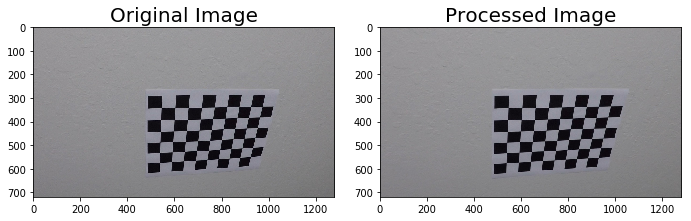

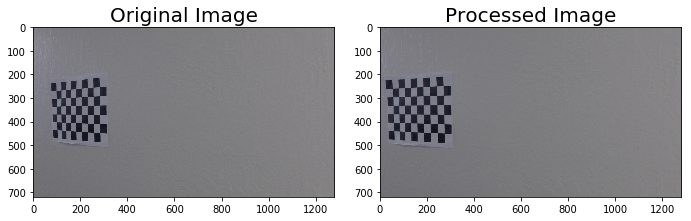

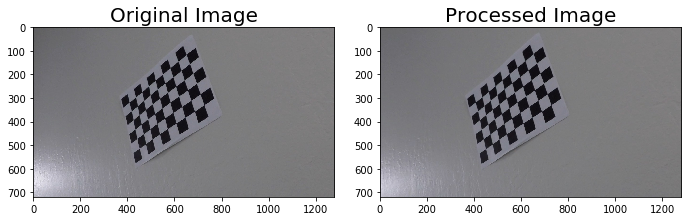

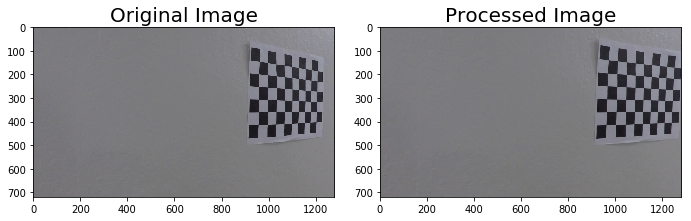

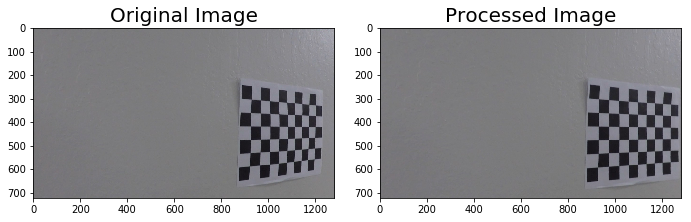

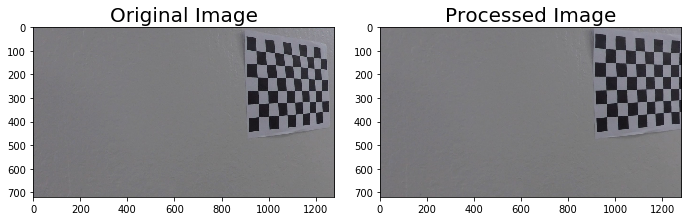

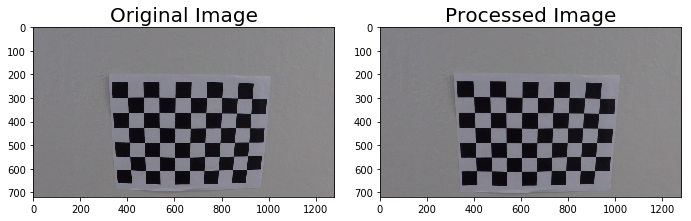

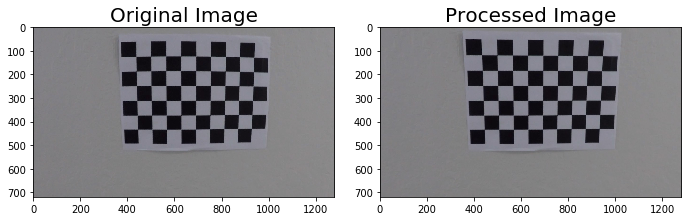

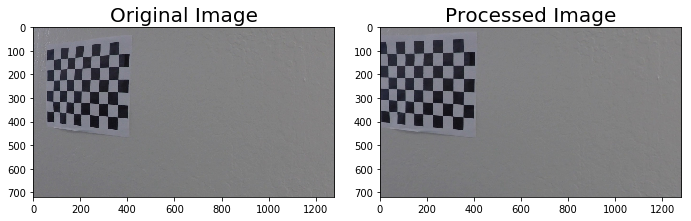

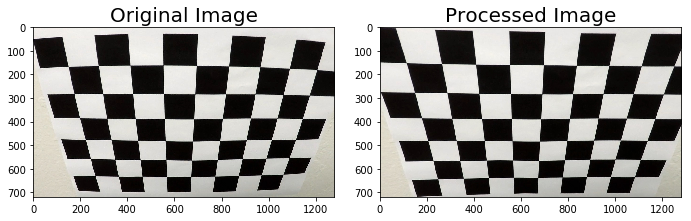

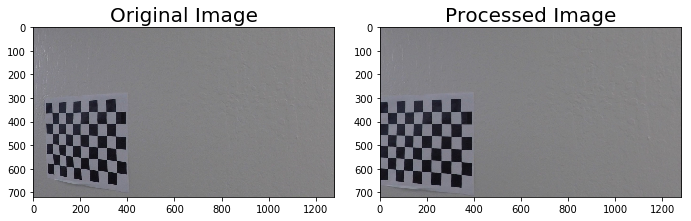

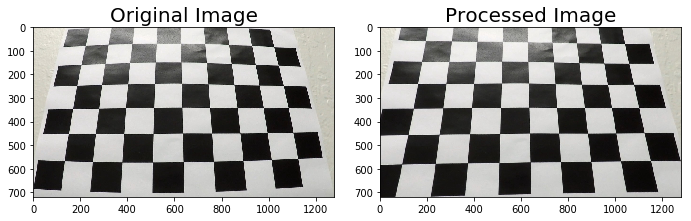

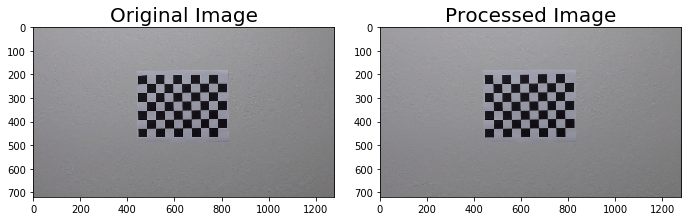

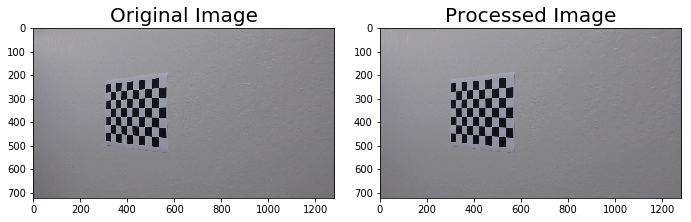

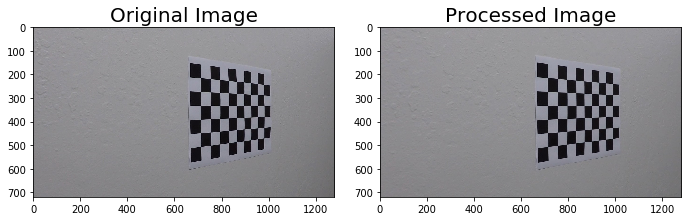

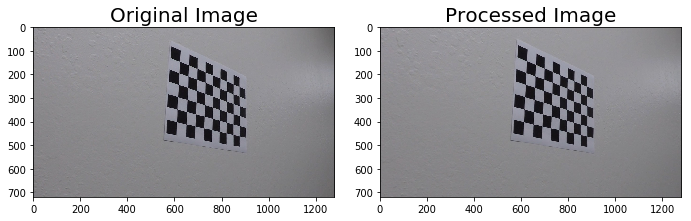

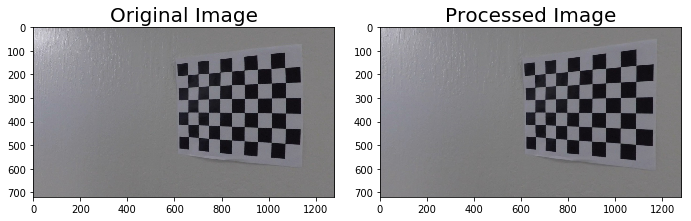

In [7]:


for index, cal_image in enumerate(cal_images):
    undist_image = undistort_image(cal_image, mtx, dist)
    compare_images(cal_image, undist_image)

### Sobel Filter

In [11]:
def abs_sobel_thresh(image, orient='x', thresh=(0,255)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    else:
        print("bad orient passed")
        exit()
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return sbinary

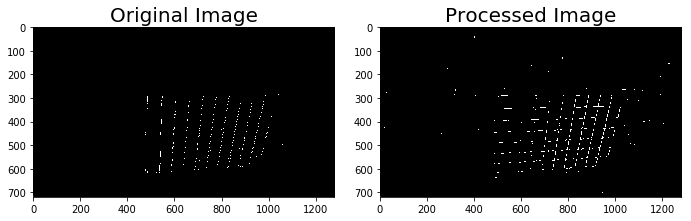

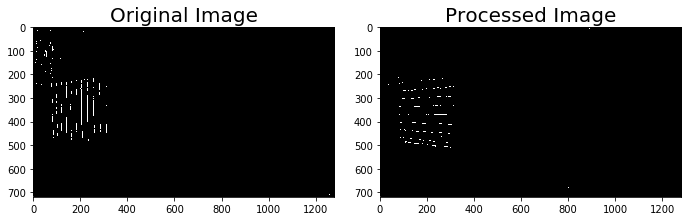

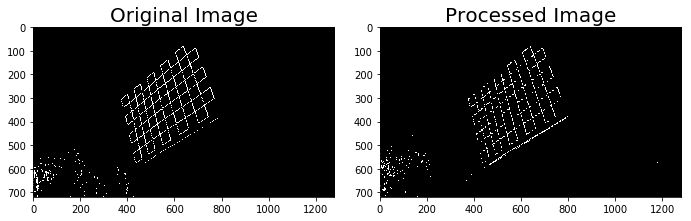

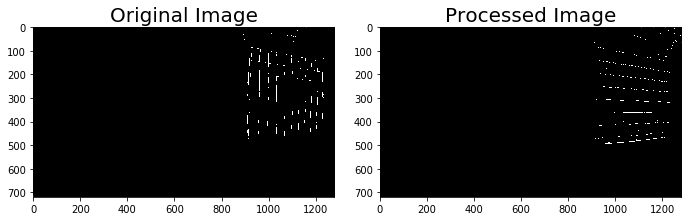

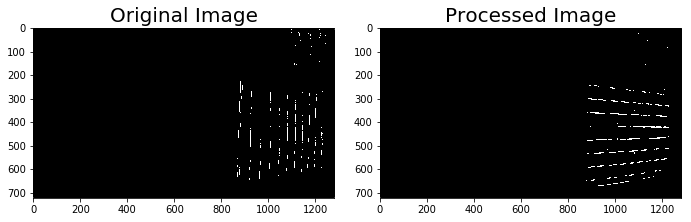

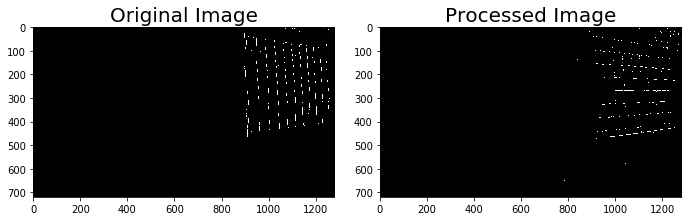

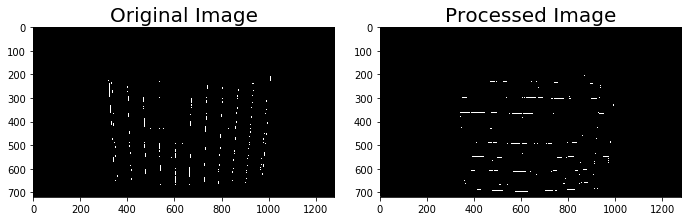

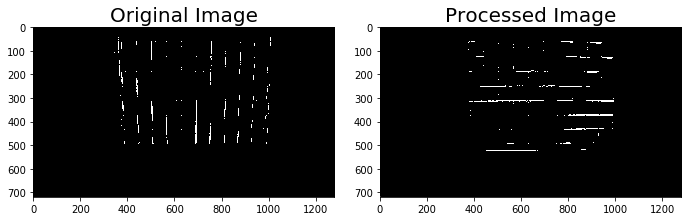

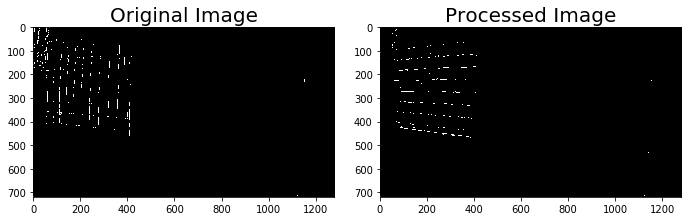

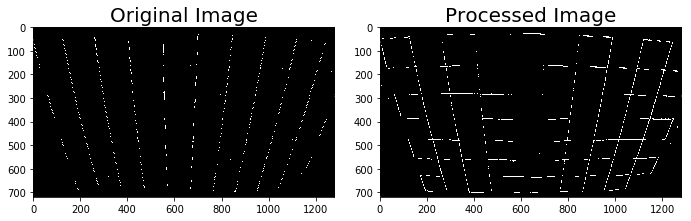

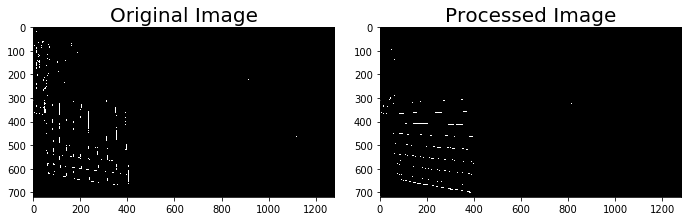

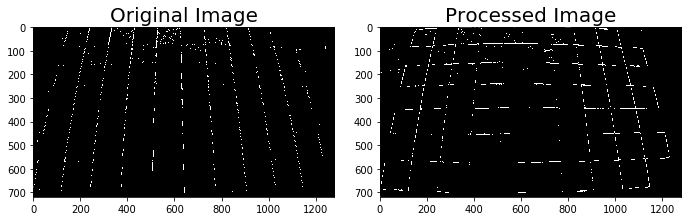

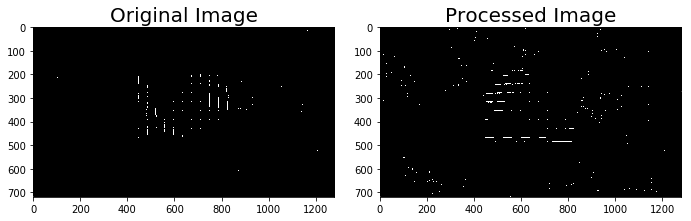

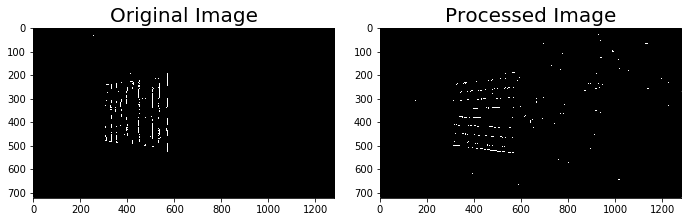

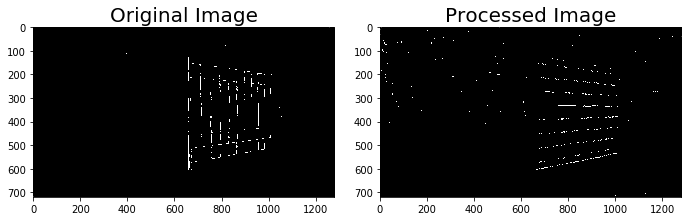

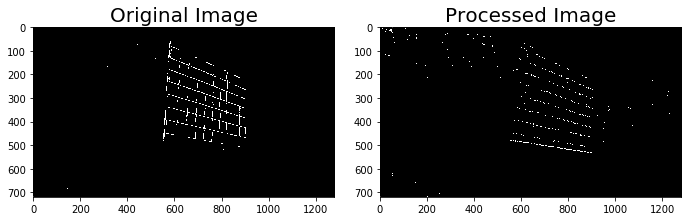

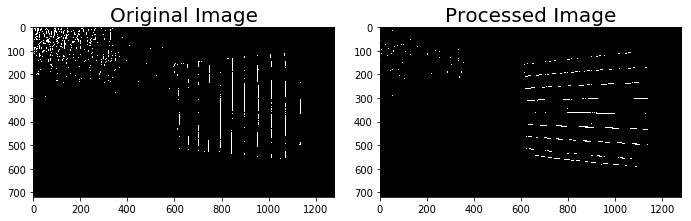

In [12]:
for image in test_images:
    xsobel = abs_sobel_thresh(image,'x', (20, 100))
    ysobel = abs_sobel_thresh(image,'y', (20, 100))
    compare_images(xsobel, ysobel, cmap='gray')
    

### Pipeline

In [42]:
def pipeline(image, mtx, dist, src, dst, area):
    new_image = cv2.undistort(image, mtx, dist, None, mtx)

   
   # xsobel = abs_sobel_thresh(new_image,'x', (20, 100))

    #ysobel = abs_sobel_thresh(new_image,'y', (20, 100))

    #magthresh =  mag_thresh(new_image,3, (30, 100))
   
    #dirthresh = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
    
    #combined = np.zeros_like(dirthresh)
    #combined[((xsobel == 1) & (ysobel == 1)) | ((magthresh == 1) & (dirthresh == 1))] = 1

    #combined[((xsobel == 1)) | ((magthresh == 1) & (dirthresh == 1))] = 1

   
    #r =  color_rgb_threshold(new_image, channel='r', thresh=(200,255))
    #s =  color_hls_threshold(new_image, channel='s', thresh=(90,200))
    
    #color_combined =np.zeros_like(r)
    #color_combined[(r == 1) & (s == 1)] = 1
    #color_combined[(s == 1)] = 1
    #combined_binary = np.zeros_like(color_combined)
    #combined_binary[(color_combined == 1) | (combined == 1)] = 1
    
    #color_binary = np.dstack(( np.zeros_like(combined), combined, color_combined))
    #combined_binary = prospective_transform(combined_binary, src, dst, area)
    #drawline_histogram(combined_binary)
    #compare_lines_images(color_binary, combined, cmap='gray')
    #compare_lines_images
    #compare_lines_images(combined_binary, image, src, dst, cmap='gray')

    #    compare_dot_images(image, new_image, src, dst)
    return new_image

### Pipeline Test

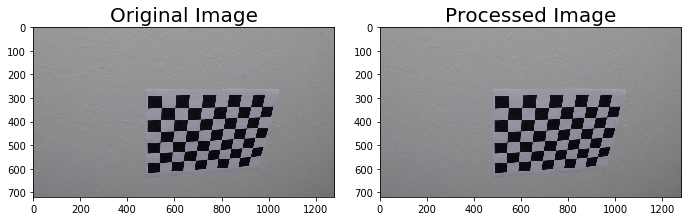

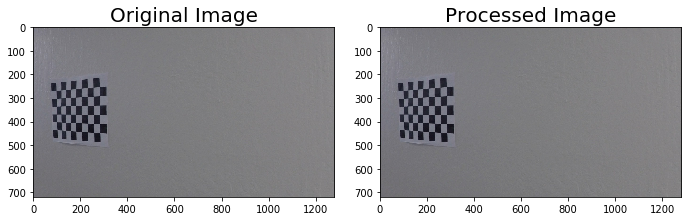

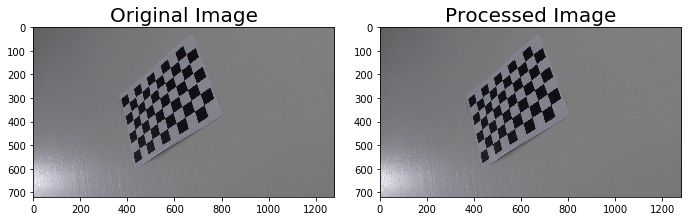

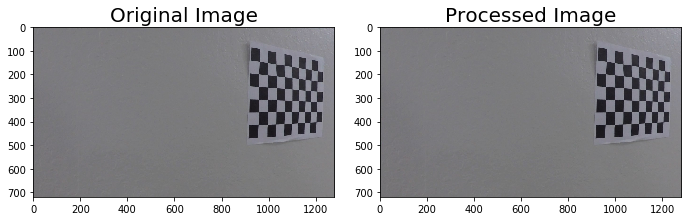

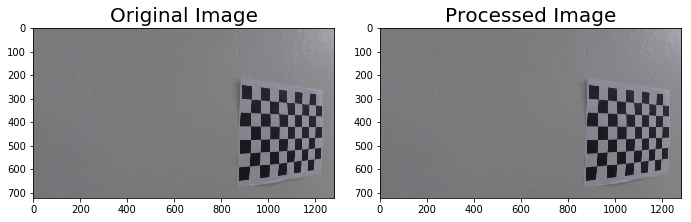

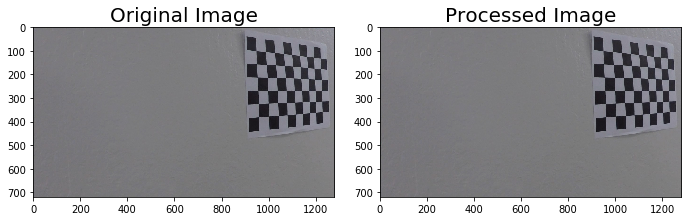

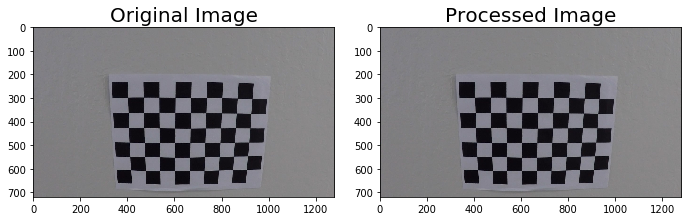

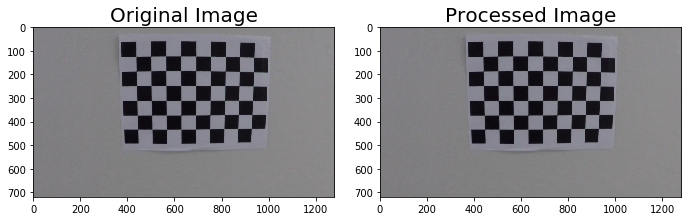

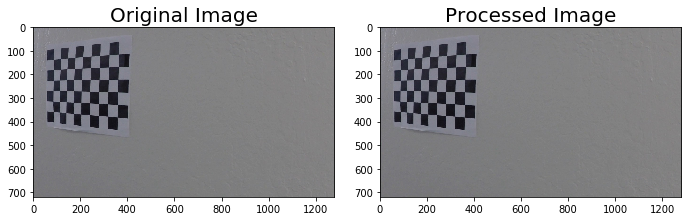

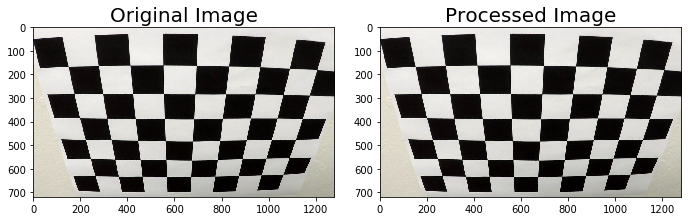

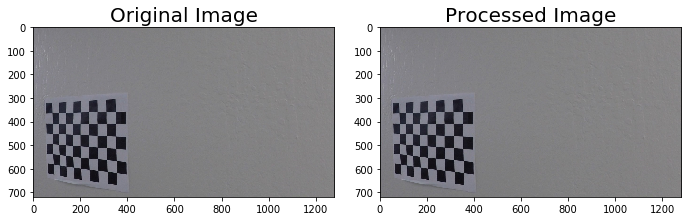

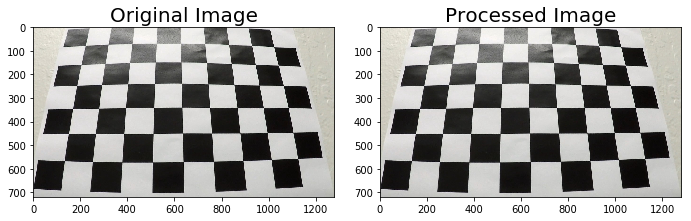

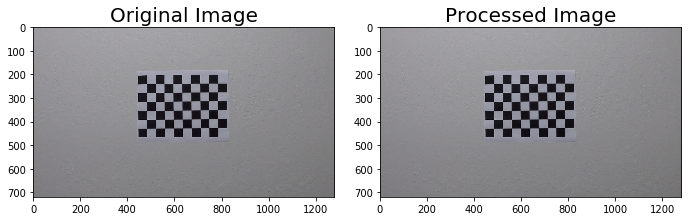

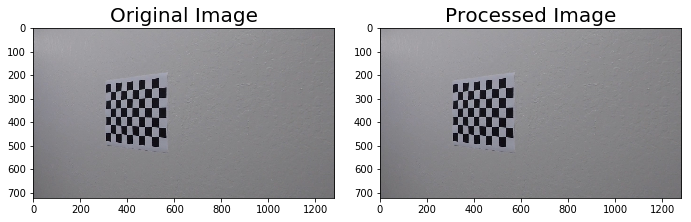

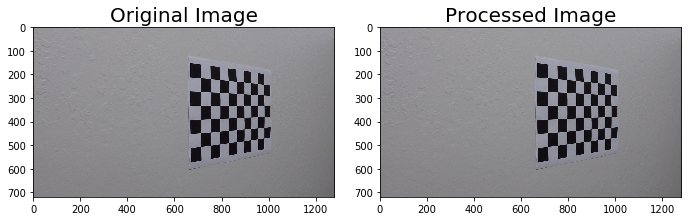

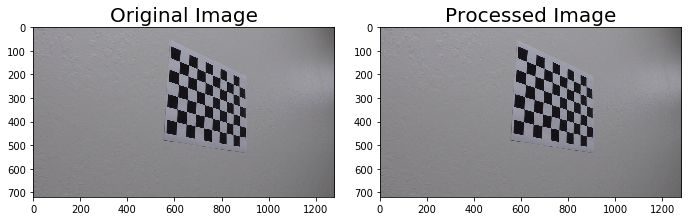

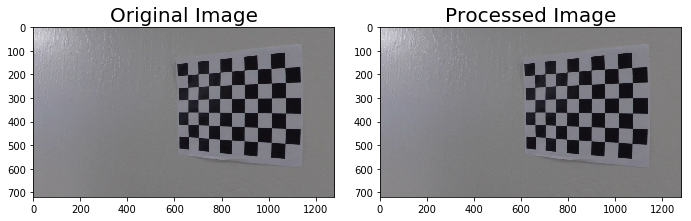

In [43]:


src = np.float32([[716, 470],
                  [1009, 660],
                  [288, 660],
                  [567, 470]])

area = trap_area(src)
dst = rec_deminsions(src, area)


for image in test_images:
    new_image = pipeline(image, mtx, dist, src, dst, area)
    compare_images(image, image)